# Integration grids

In order to do DFT calculations we use an integration grid when evaluating the exchange–correlation integrals. There are many integration schemes around. Most of them calculate the integrals as weighted sum over a finite amount of grid points generally defined on the surface of a sphere. The “thickness” of these grids is usually represented by the corresponding number of radial and angular points. The choice of the grid can significantly affect the computed results.
The SG-0 and SG-1 (pruned 50,194 with < 40% of the points of the full grid) grids were optimized for an integration error in the energy to fall below a target threshold. Unfortunately, derivatives of the energy (eg. (hyper)polarizabilities) are often more sensitive to the quality of the integration grid. 
This is also true when imaginary vibrational frequencies or  PES curves of non-bonded interactionsare are calculated. If the grid is low quality,  low-frequency (but real) vibrational frequencies might manifest as imaginary and PES curves might contain artefacts.

More recent functionals developed since ~2005 often depend on the kinetic energy density or the laplacian of the density (e.g Meta-GGA functionals) and require finer grids than GGA functionals. 

The issue of choosing the most appropriate integration grid is often overlooked. Relying on the default settings of quantum chemistry programs is not a good idea, even if some developers implemented variable grid requirements that depend on the chosen functional (e.g in Q-Chem). In this experiment we will look at the dissociation curve of the argon dimer, between 3.0 and 6.0 Ångström using psi4 which uses the medium quality 75, 302 grid as default. 

Try the b3lyp and the m06-hf functional. 

Sources: [Q-Chem Documentation](https://manual.q-chem.com/5.2/Ch5.S5.SS2.html)
[Morgante and Peverati](https://doi.org/10.1002/qua.26332)

In [1]:
import psi4
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Lets create the distances we will be looking at
distances = np.linspace(3, 6, 31)

In [3]:
reference = [2.24,1.21, 0.57, 0.18, -0.06, -0.19, -0.26, -0.28, -0.28 , -0.27, -0.25, -0.23, -0.21, -0.18, -0.16, -0.14, -0.13, -0.11, -0.10, -0.09, -0.08, -0.07, -0.06, -0.05, -0.05, -0.04, -0.04, -0.03, -0.03, -0.03, -0.02]

In [7]:

functional = "b3lyp" # try b3lyp and m06-hf
energies = {}
distances = np.linspace(3, 6, 31)

# here we setup the grid points in a dictionary to iterate over them
grid_options = {
    'sg1':{'dft_grid_name':'sg1'}, # as this is a pruned grid it is set up differently
    '75-302':{'dft_radial_points':75, 'dft_spherical_points': 302}, # default in psi4
    '99-590':{'dft_radial_points':99, 'dft_spherical_points': 590}
}

# we have two nested loops here, the outer loop will run three times (once per grid setting)
for grid in grid_options.keys():
    psi4.core.clean_options()
    psi4.set_options(grid_options[grid])

    energies[grid] = []

    # the inner loop runs for the distance array
    for R in distances:
        # Argon Dimer Z-Matrix
        ar_dimer = psi4.geometry(f"""
        0 1
        Ar 
        Ar 1 {R}
        """)
        energies[grid].append(psi4.energy(functional+"/def2-QZVP", molecule=ar_dimer))
    

In [8]:
# Calculate energy of single Argon atom
psi4.core.clean_options()
ar = psi4.geometry("""
Ar 0 0 0
""")

E_ar = psi4.energy(functional+"/def2-QZVP", molecule = ar)

```{admonition} Exercise
:class: exercise
Which grid size should you use for this kind of problem? Are the fluctuations observed with the SG1 grid physical?
```

```{admonition} Exercise
:class: exercise
Compare the two functionals regarding convergence with respect to the integration grid. Which functional shows concerning behavior in this regard?
```



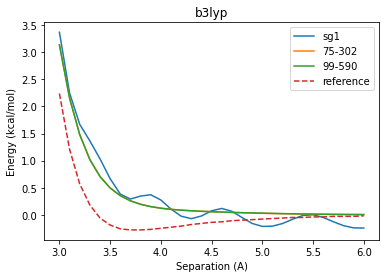

In [9]:
fig, ax = plt.subplots(1)
ax.set_title(functional)
# we plot the curves for each grid we used 
for grid in grid_options.keys():
    # the interaction energy is the E_dimer - 2*E_single
    e = (np.array(energies[grid])-2*E_ar)*psi4.constants.hartree2kcalmol
    ax.plot(distances, e, label=grid)
ax.plot(distances, reference, label='reference', linestyle="--")
ax.set_xlabel('Separation (A)')
ax.set_ylabel('Energy (kcal/mol)')
ax.legend()
fig.savefig(functional+'-integrationgrid.jpg')
plt.show()